In [1]:
%cd ..


C:\Users\kubak\Desktop\Klasyfikator


C:\Users\kubak\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
train_data, meta_train = arff.loadarff('datasets/Yoga/Yoga_TRAIN.arff')
test_data, meta_test = arff.loadarff('datasets/Yoga/Yoga_TEST.arff')

# Convert the data to a pandas DataFrame
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Extract features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Convert byte strings to normal strings for labels
y_train = np.array([int(label.decode('utf-8')) for label in y_train])
y_test = np.array([int(label.decode('utf-8')) for label in y_test])

# Step 2: Preprocess the Data
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Train the Model
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Output the predictions for further use if needed
print(f'Predictions: {y_pred}')


Train Accuracy: 1.0000
Test Accuracy: 0.8107
Predictions: [2 2 1 ... 1 1 2]


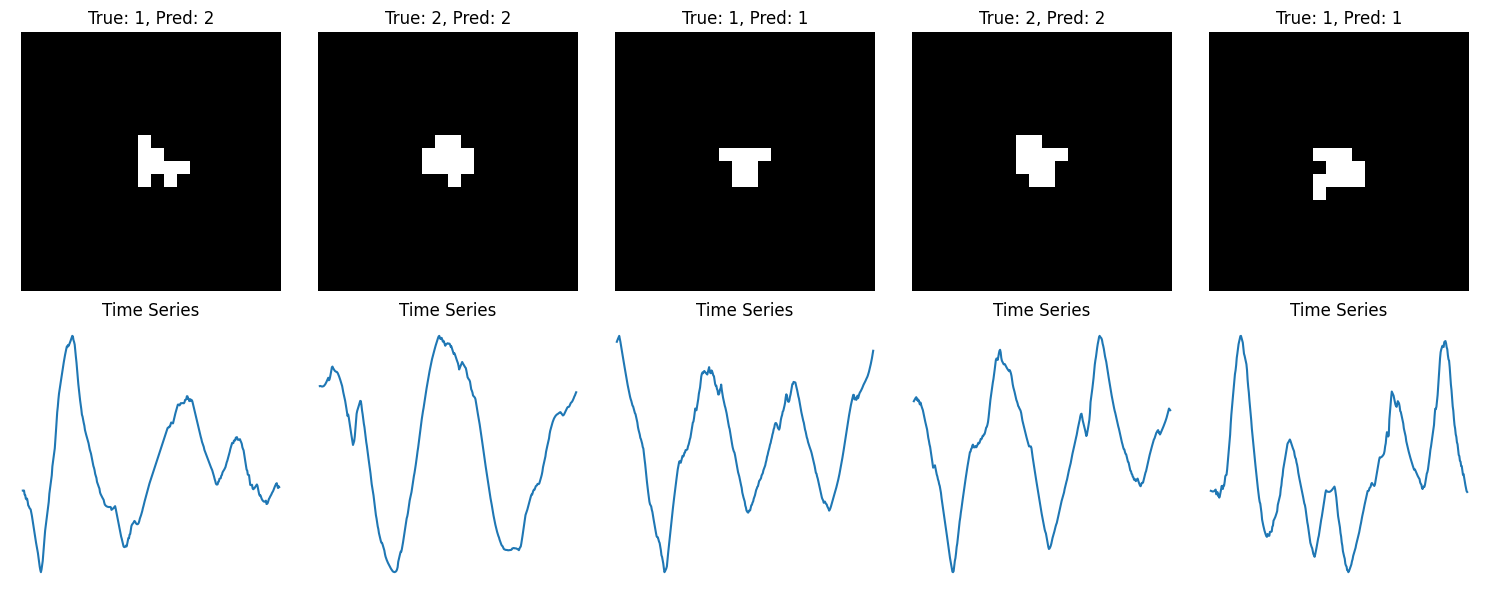

In [3]:
# Step 7: Reconstruct and Display Images
def reconstruct_image(time_series, length):
    # Assuming the image is square
    size = int(np.sqrt(length))
    image = np.zeros((size, size))
    center = size // 2
    for i in range(length):
        angle = 2 * np.pi * i / length
        x = int(center + time_series[i] * np.cos(angle))
        y = int(center + time_series[i] * np.sin(angle))
        if 0 <= x < size and 0 <= y < size:
            image[x, y] = 1
    return image

# Display a few images with their predictions
num_images_to_display = 5
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 6))

for i in range(num_images_to_display):
    time_series = X_test[i]
    true_label = y_test[i]
    pred_label = y_pred[i]
    image = reconstruct_image(time_series, len(time_series))

    axes[0, i].imshow(image, cmap='gray')
    axes[0, i].set_title(f'True: {true_label}, Pred: {pred_label}')
    axes[0, i].axis('off')

    # Display corresponding original time series
    axes[1, i].plot(time_series)
    axes[1, i].set_title('Time Series')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from fcmeans import FCM

# Step 1: Load the Dataset
# Step 1: Load the Dataset
train_data, meta_train = arff.loadarff('datasets/Yoga/Yoga_TRAIN.arff')
test_data, meta_test = arff.loadarff('datasets/Yoga/Yoga_TEST.arff')

# Convert the data to a pandas DataFrame
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Extract features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Convert byte strings to normal strings for labels
y_train = np.array([int(label.decode('utf-8')) for label in y_train])
y_test = np.array([int(label.decode('utf-8')) for label in y_test])

# Step 2: Preprocess the Data
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Apply Fuzzy C-Means
# Initialize FCM with 2 clusters (for the two classes)
fcm = FCM(n_clusters=2, random_state=42)
fcm.fit(X_train)

# Get the membership scores for the test set
u = fcm.predict(X_test)

# Ensure u is a 2D array
if u.ndim == 1:
    u = np.expand_dims(u, axis=1)

# Step 4: Assign Labels
# Assign labels based on the highest membership score
y_pred_test = np.argmax(u, axis=0)

# Step 5: Evaluate the Model
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Step 6: Reconstruct and Display Images
def reconstruct_image(time_series, length):
    # Assuming the image is square
    size = int(np.sqrt(length))
    image = np.zeros((size, size))
    center = size // 2
    for i in range(length):
        angle = 2 * np.pi * i / length
        x = int(center + time_series[i] * np.cos(angle))
        y = int(center + time_series[i] * np.sin(angle))
        if 0 <= x < size and 0 <= y < size:
            image[x, y] = 1
    return image

# Display a few images with their predictions
num_images_to_display = 5
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 6))

for i in range(num_images_to_display):
    time_series = X_test[i]
    true_label = y_test[i]
    pred_label = y_pred_test[i]
    image = reconstruct_image(time_series, len(time_series))

    axes[0, i].imshow(image, cmap='gray')
    axes[0, i].set_title(f'True: {true_label}, Pred: {pred_label}')
    axes[0, i].axis('off')

    # Display corresponding original time series
    axes[1, i].plot(time_series)
    axes[1, i].set_title('Time Series')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3000, 1]